# Programming for Data Science Project:
##  _Where Should I Live?_

Before we can begin wrangling the data, I need to be able to read it. Therefore, we start by importing the necessary libraries and create the DataFrame 'cities' from city_data.csv. Next, we must adjust the seperator which is necessary to properly read the CSV-file. As a final touch, I restore the index column and header to the way they should be by defining the index_col as the first column and header as the first row. Finally, I make a copy before I start messing around with the data; and we're off to the races.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

cities = pd.read_csv('city_data.csv', sep='|', index_col=0, header=1)
cities_og = cities.copy
cities

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
City,,,,,,,,,,,,,
"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,NaN,2024-09-11 00:00:00
"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,NaN,2023-03-10 00:00:00
"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,NaN,2024-07-07 00:00:00


In [111]:
cities.rename({'Greece, Athens':'Athens, Greece'}, inplace=True)


### 1. How we handled missing values and duplicate records in the dataset.

Before I could do anything about the missing data, I first needed to know ho much was missing and where.

In [112]:
cities.isnull().sum()

Population Density                  1
Population                          0
Working Age Population              1
Youth Dependency Ratio              0
Unemployment Rate                   1
GDP per Capita                      1
Days of very strong heat stress     0
Main Spoken Languages               1
Average Monthly Salary              0
Avgerage Rent Price                 0
Average Cost of Living              0
Average Price Groceries            80
Last Data Update                    0
dtype: int64

Single missing values will be imputated by the mean or back/forward filling or even by inserting values from trusted sources. The columns with many missing values will be completed if possible or replaced completely.

Side Note: When investigating the columns 'Population' and 'Population Density' we discovered that they were full of completely incorrect values. We will be replacing these columns at a later stage with outsourced data.

In [113]:
cities.rename(columns={'Working Age Population ': 'Working Age Population', 'Days of very strong heat stress': 'Heat Stress Days', 'Avgerage Rent Price':'Average Rent Price'}, inplace=True)
cities

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Heat Stress Days,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
City,,,,,,,,,,,,,
"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,NaN,2024-09-11 00:00:00
"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,NaN,2023-03-10 00:00:00
"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,NaN,2024-07-07 00:00:00


The column 'Working Age Population ' had a space at the end and 'Days of very strong heat stress' was a pain to use, so we renamed both.

In [114]:
missing1val = ['Main Spoken Languages', 'Population Density', 'Working Age Population']
for column in missing1val:
    missing_indices = cities[cities.loc[:, column].isnull()].any(axis=1).index.tolist()
    print(cities.loc[missing_indices, column])

City
Dusseldorf, Germany    NaN
Name: Main Spoken Languages, dtype: object
City
Valencia, Spain   NaN
Name: Population Density, dtype: float64
City
Dusseldorf, Germany   NaN
Name: Working Age Population, dtype: float64


In [115]:
cities['Working Age Population']=cities['Working Age Population'].ffill()
cities['GDP per Capita']=cities['GDP per Capita'].fillna(cities['GDP per Capita'].mean())
cities['Population Density']=cities['Population Density'].bfill()

In [116]:
cities.loc[cities['Unemployment Rate'].isnull(), 'Unemployment Rate'] = 10.4 #Source: https://ec.europa.eu/eurostat/databrowser/bookmark/ab2f73aa-b0e7-416e-84f9-4ced10a5d68e?lang=en&createdAt=2025-09-23T10:11:50Z
cities.loc[cities['Main Spoken Languages'].isnull(), 'Main Spoken Languages'] = 'German'

In [117]:
cities.drop(['Average Price Groceries'], axis=1, inplace=True)

In [118]:
cities['Working Age Population']=cities['Working Age Population'].astype(int)

In [119]:
city_names = cities.index
duplicates = cities[city_names.duplicated()]
cities.drop_duplicates(inplace=True)
duplicates.index

Index(['Berlin. Germany', 'Malaga, Spain'], dtype='object', name='City')

To clean up the index, we opted to first make the indexes uniform and then split them into a multi-index split into countries and cities.

In [120]:
new_index = []
country_cities = []
for row in cities.index:
    row_new = ''
    for i in range(len(row)):
        if row[i].isalnum() or (row[i] == ' ' and row[i+1] != ' '):
            row_new += row[i]
        else:
            if row[i+1] == ' ':
                row_new += ','
            else:
                row_new += ', '
    new_index.append(row_new)
country_cities = [[country.split(', ')[1] for country in new_index],[city.split(', ')[0] for city in new_index]]
tuples = list(zip(*country_cities))
m_index = pd.MultiIndex.from_tuples(tuples, names=['Country', 'City'])
cities = cities.set_index(m_index)
cities

Population Density  Population  Working Age Population  \
Country City                                                                 
Austria Vienna                   310.0     2983513                 2018818   
        Salzburg                 243.0      375489                  250472   
Belgium Brussels                 681.0     3284548                 2137425   
        Antwerp                  928.0     1139663                  723396   
        Gent                     552.0      645813                  417832   
...                                ...         ...                     ...   
Sweden  Stockholm                334.0     2344124                 1534225   
        Gothenburg               245.0     1037675                  672152   
        Malmo                    368.0      680335                  436271   
Turkiye Ankara                  1922.0     4843511                 3417691   
        Adana                    552.0     1074543                  718256   

                    Youth Dependency Ratio  Unemployment Rate  GDP per Capita  \
Country City                                                                    
Austria Vienna                        20.1               10.2         55770.0   
        Salzburg                      20.3                3.0         66689.0   
Belgium Brussels                      27.5               10.7         62500.0   
        Antwerp                       27.7                6.2         57595.0   
        Gent                          24.8               10.4         53311.0   
...                                    ...                ...             ...   
Sweden  Stockholm                     28.5                6.2         70950.0   
        Gothenburg                    28.2                6.3         49588.0   
        Malmo                         29.4                9.2         44387.0   
Turkiye Ankara                        30.0               14.4         38916.0   
        Adana                         37.8               12.2         19945.0   

                    Heat Stress Days              Main Spoken Languages  \
Country City                                                              
Austria Vienna                     3  German, English, Turkish, Serbian   
        Salzburg                   0                             German   
Belgium Brussels                   3     French, Dutch, Arabic, English   
        Antwerp                    3              Dutch, French, Arabic   
        Gent                       2                      Dutch, French   
...                              ...                                ...   
Sweden  Stockholm                  0                   Swedish, English   
        Gothenburg                 0                   Swedish, English   
        Malmo                      0                   Swedish, English   
Turkiye Ankara                     3                            Turkish   
        Adana                     59                            Turkish   

                    Average Monthly Salary  Average Rent Price  \
Country City                                                     
Austria Vienna                        2500                1050   
        Salzburg                      3200                1100   
Belgium Brussels                      3350                1200   
        Antwerp                       2609                 900   
        Gent                          2400                 827   
...                                    ...                 ...   
Sweden  Stockholm                     2700                1400   
        Gothenburg                    2500                1200   
        Malmo                         2400                1100   
Turkiye Ankara                         900                 450   
        Adana                          750                 350   

                    Average Cost of Living     Last Data Update  
Country City                                      

2.a) --> Germany:10

In [121]:
unique_countries = cities.index.get_level_values('Country')
unique_countries.value_counts().sort_values(ascending=False).head(1)

Country
Germany    10
Name: count, dtype: int64

2.b) -->Nr of cities in total: 84 | Nr of greek cities: 1

In [122]:
nr_cities = len(cities)
nr_greek_cities = len(cities.loc['Greece'])
print(f'Nr of cities in total: {nr_cities} | Nr of greek cities: {nr_greek_cities}')

Nr of cities in total: 84 | Nr of greek cities: 2


2.c)-->Least Spoken Languages: 13 diff | Most Spoken Languages: English, German, Turkish

In [135]:
#cities['Main Spoken Languages']=cities['Main Spoken Languages'].apply(lambda lang: lang.split(', '))
main_langs = cities.explode('Main Spoken Languages').reset_index()
main_langs = main_langs['Main Spoken Languages'].apply(lambda row: row.strip())
main_langs.value_counts().tail(13)

Main Spoken Languages
Latvian              1
Maltese              1
Serbian              1
Romanian             1
Slovak               1
Scots Gaelic         1
Luxembourgish        1
Scots                1
Bengali              1
Estonian             1
Spanish;Valencian    1
Catalan              1
Slovene              1
Name: count, dtype: int64

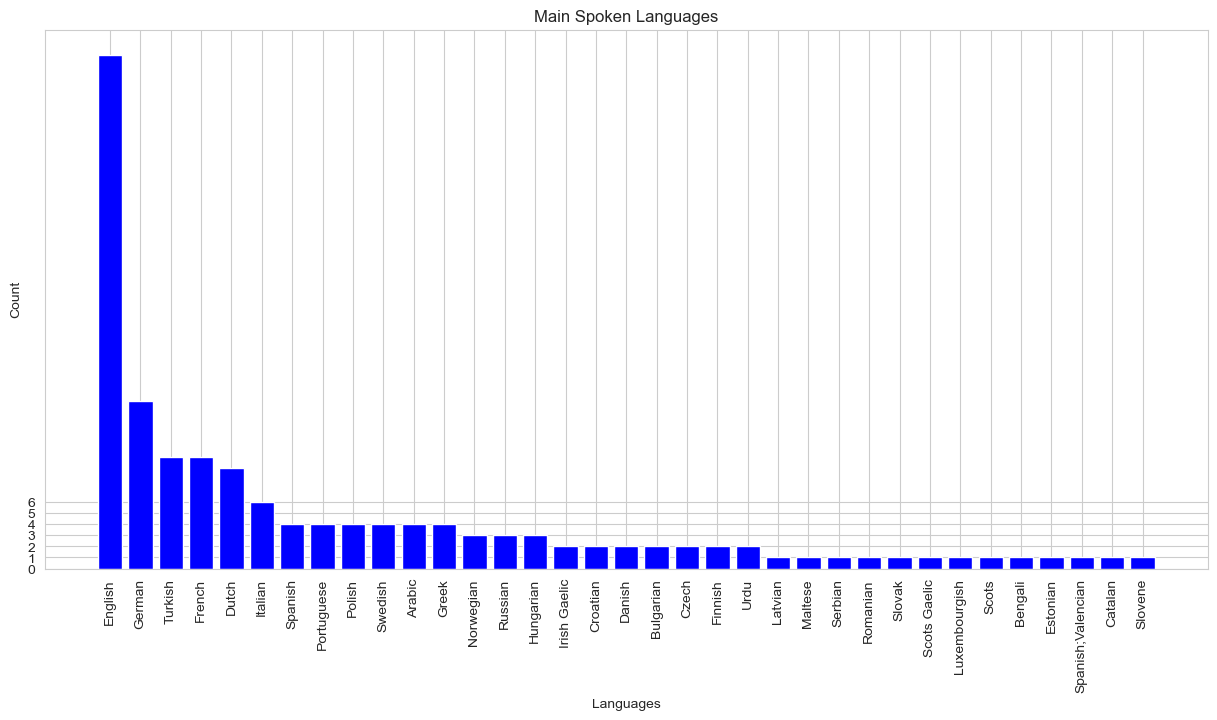

In [133]:

labels = main_langs.value_counts().index
lng_cnt = main_langs.value_counts()
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(labels, lng_cnt, width=0.8, color='b')
ax.set_yticks([_ for _ in range(0,7)])
plt.xlabel('Languages')
plt.ylabel('Count')
plt.title('Main Spoken Languages')
plt.xticks(rotation=90)
plt.show()

3.a) Basel, Munich, Frankfurt am Main, Lyon, Venice, Gothenburg

In [16]:
cities['Last Data Update']=pd.to_datetime(cities['Last Data Update'])

In [17]:
cities[cities['Last Data Update']<'2023-04']

Population Density  Population  \
Country     City                                                
Switzerland Basel                           793.0      550152   
Germany     Munich                          529.0     2907752   
            Frankfurt am Main               631.0     2710501   
France      Lyon,                         10909.0      520774   
Italy       Venice                          852.0      557748   
Sweden      Gothenburg                      245.0     1037675   

                               Working Age Population  Youth Dependency Ratio  \
Country     City                                                                
Switzerland Basel                              358020                   21.50   
Germany     Munich                            1955041                   21.10   
            Frankfurt am Main                 1791435                   22.00   
France      Lyon,                              365824                   27.31   
Italy       Venice                             347781                   19.30   
Sweden      Gothenburg                         672152                   28.20   

                               Unemployment Rate  GDP per Capita  \
Country     City                                                   
Switzerland Basel                            5.3         94826.0   
Germany     Munich                           2.1         83965.0   
            Frankfurt am Main                3.2         69372.0   
France      Lyon,                            6.9         46226.0   
Italy       Venice                           6.1         39681.0   
Sweden      Gothenburg                       6.3         49588.0   

                               Heat Stress Days    Main Spoken Languages  \
Country     City                                                           
Switzerland Basel                             5  German, English, French   
Germany     Munich                            1          German, English   
            Frankfurt am Main                 6          German, English   
France      Lyon,                            11                   French   
Italy       Venice                            6                  Italian   
Sweden      Gothenburg                        0         Swedish, English   

                               Average Monthly Salary  Average Rent Price  \
Country     City                                                            
Switzerland Basel                                6366                2500   
Germany     Munich                               3540                1500   
            Frankfurt am Main                    3800                1300   
France      Lyon,                                2300                1200   
Italy       Venice                               1400                1150   
Sweden      Gothenburg                           2500                1200   

                               Average Cost of Living Last Data Update  
Country     City                                                        
Switzerland Basel                                4239       2023-01-19  
Germany     Munich                               2550       2023-03-16  
            Frankfurt am Main                    2350       2023-02-04  
France      Lyon,                                1800       2023-03-31  
Italy       Venice                               1500       2023-03-23  
Sweden      Gothenburg                           2100       2023-03-10

3.b) Oslo: 12th of Descemer 2024

In [18]:
cities['Last Data Update'].sort_values(ascending=False)

Country         City             
Norway          Oslo                2024-12-12
Czechia         Prague              2024-12-05
Luxembourg      Luxembourg          2024-11-29
Germany         Cologne             2024-11-23
United Kingdom  Leeds               2024-11-03
                                       ...    
Italy           Venice              2023-03-23
Germany         Munich              2023-03-16
Sweden          Gothenburg          2023-03-10
Germany         Frankfurt am Main   2023-02-04
Switzerland     Basel               2023-01-19
Name: Last Data Update, Length: 84, dtype: datetime64[ns]

4.a)

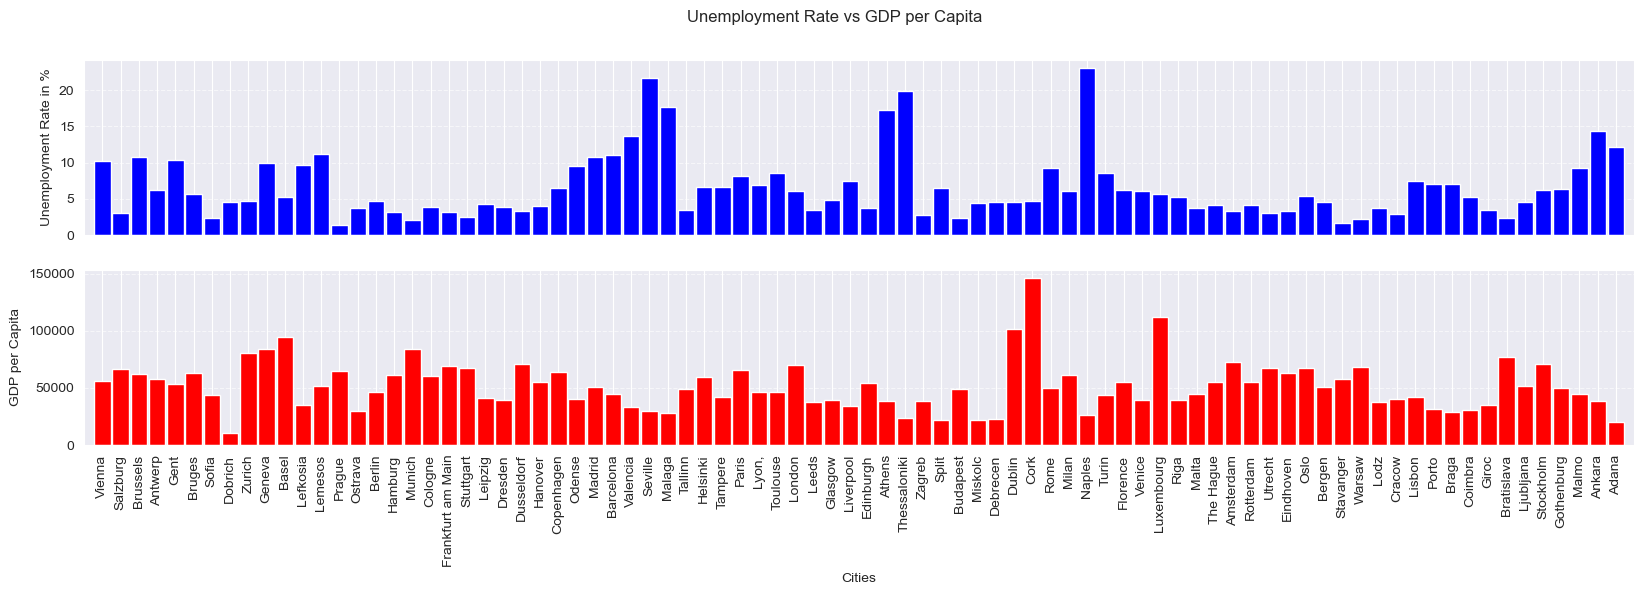

In [19]:
fig, ax  = plt.subplots(2,1, figsize=(20, 5))
labels = cities.index.get_level_values(1)
hobo = cities['Unemployment Rate']
plt.suptitle('Unemployment Rate vs GDP per Capita')
ax[0].bar(labels, hobo, width=0.9, color='b', align='center')
ax[0].set_xlim(-1, len(hobo))
ax[0].set_ylabel('Unemployment Rate in %')
ax[0].tick_params(labelbottom=False)
ax[0].grid(axis='y', linestyle='--', alpha=0.6)
broke = cities['GDP per Capita']
ax[1].bar(labels, broke, width=0.9, color='r', align='center')
ax[1].set_xlim(-1, len(broke))
ax[1].set_xlabel('Cities')
ax[1].set_ylabel('GDP per Capita')
ax[1].grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.show()

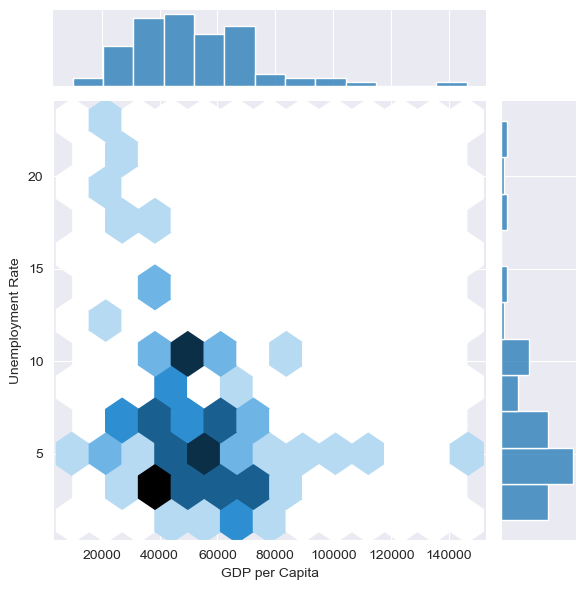

In [20]:
sns.jointplot(cities, x='GDP per Capita', y='Unemployment Rate', kind='hex')
plt.show()

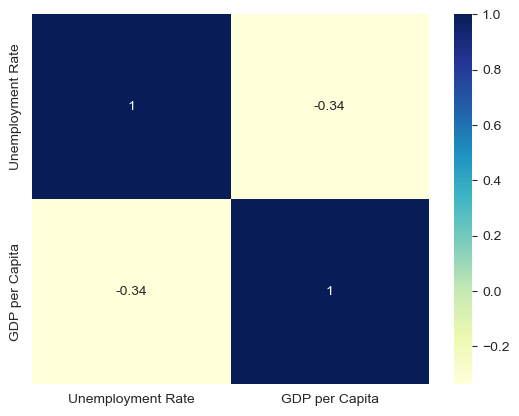

In [21]:
broke_scale = cities.loc[:, 'Unemployment Rate':'GDP per Capita']
sns.heatmap(broke_scale.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [22]:
cities_update = pd.read_csv(r'C:\Users\Lucas\Documents\NOVA IMS\PDS\Project\cities_pop_updated.csv')
cities_update.set_index('City', inplace=True)
cities_update_merge = pd.merge(cities, cities_update, on='City')
cities_update_merge.head()

,Population Density,Population_x,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Heat Stress Days,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Population_y,Area,Density,Wikipedia URL
City,,,,,,,,,,,,,,,,
Vienna,310.0,2983513,2018818,20.10,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15,1982000,414.65,4783,https://en.wikipedia.org/wiki/Vienna
Salzburg,243.0,375489,250472,20.30,3.0,66689.0,0,German,3200,1100,2186,2023-11-03,157938,65.67,2405,https://en.wikipedia.org/wiki/Salzburg
Brussels,681.0,3284548,2137425,27.50,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22,184217,32.61,5648,https://en.wikipedia.org/wiki/Brussels
Antwerp,928.0,1139663,723396,27.70,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09,534561,204.51,2615,https://en.wikipedia.org/wiki/Antwerp
Bruges,840.0,119765,74600,25.63,5.6,63083.0,0,"Dutch, French",2700,1250,1708,2023-10-25,118356,138.40,855,https://en.wikipedia.org/wiki/Bruges


In [23]:
rich_cities = cities.loc[:, ('Average Monthly Salary','Average Cost of Living')]
rich_cities['delta']=rich_cities['Average Monthly Salary']-cities['Average Cost of Living']
rich_cities.sort_values('delta', ascending=False, inplace=True)
rich_cities

Average Monthly Salary  Average Cost of Living  \
Country     City                                                           
Switzerland Basel                           6366                    4239   
Finland     Tampere                         3500                    1600   
            Helsinki                        3900                    2050   
Switzerland Zurich                          6636                    4862   
            Geneva                          5794                    4263   
...                                          ...                     ...   
Italy       Venice                          1400                    1500   
Greece      Thessaloniki                    1000                    1100   
            Athens                          1050                    1200   
Portugal    Porto                           1100                    1400   
            Lisbon                          1220                    1600   

                          delta  
Country     City                 
Switzerland Basel          2127  
Finland     Tampere        1900  
            Helsinki       1850  
Switzerland Zurich         1774  
            Geneva         1531  
...                         ...  
Italy       Venice         -100  
Greece      Thessaloniki   -100  
            Athens         -150  
Portugal    Porto          -300  
            Lisbon         -380  

[84 rows x 3 columns]

4.b

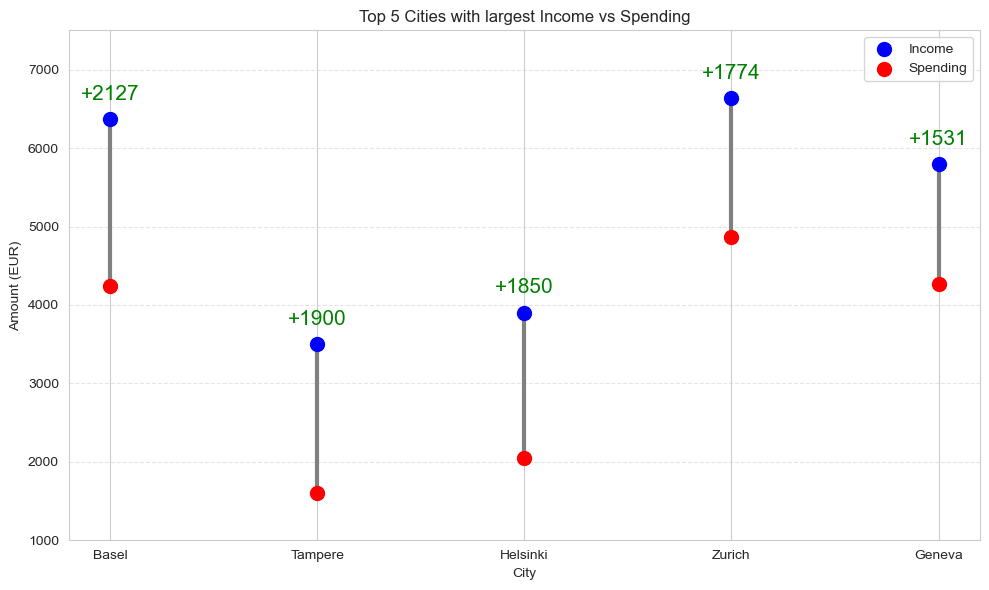

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

income = rich_cities['Average Monthly Salary'][:5]
spending = rich_cities['Average Cost of Living'][:5]
delta = rich_cities['delta'][:5]
city_names = rich_cities.index.get_level_values(1)[:5]

ax.vlines(x=city_names, ymin=spending, ymax=income, color='gray', linewidth=3)

ax.scatter(city_names, income, color='blue', s=100, label='Income', zorder=10)
ax.scatter(city_names, spending, color='red', s=100, label='Spending', zorder=10)

for i in range(5):
    ax.text(city_names[i], income.iloc[i] + 200, f"+{delta.iloc[i]}",
            ha='center', va='bottom', fontsize=15, color='green')

ax.set_ylim(1000, 7500)
ax.set_ylabel('Amount (EUR)')
ax.set_xlabel('City')
ax.set_title('Top 5 Cities with largest Income vs Spending')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


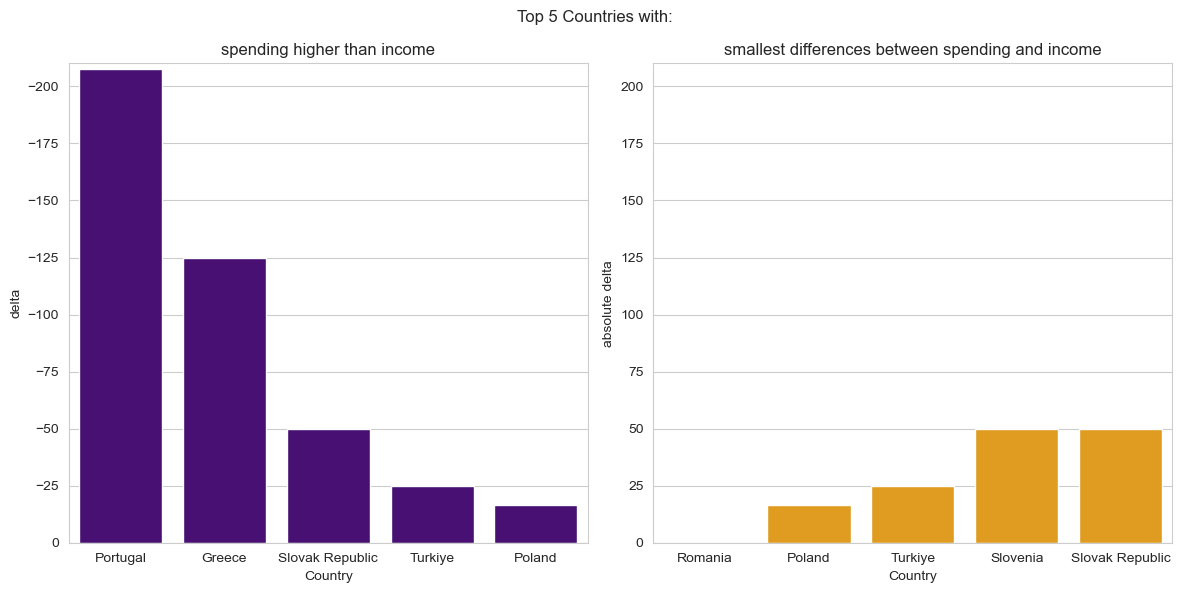

In [62]:
poor_countries = rich_cities.groupby('Country')['delta'].mean().sort_values().head(5)
poor_countries_abs = abs(rich_cities.groupby('Country')['delta'].mean()).sort_values().head(5)
fig, ax = plt.subplots(1,2,figsize=(12, 6))
sns.barplot(poor_countries, color='indigo', ax=ax[0])
sns.barplot(poor_countries_abs, color='orange', ax=ax[1])
plt.suptitle('Top 5 Countries with:')
ax[0].set_title("spending higher than income")
ax[1].set_title("smallest differences between spending and income")
ax[1].set_ylabel('absolute delta')
ax[0].set_ylim(0,-210)
ax[1].set_ylim(0,210)
plt.tight_layout()
plt.show()

4.c)

In [26]:
best_paid_cities = cities[cities['Average Monthly Salary']>2000].sort_values('Average Monthly Salary', ascending=False)
cheap_cities = best_paid_cities[best_paid_cities['Average Cost of Living']<=1600]
least_broke = cheap_cities.sort_values('Unemployment Rate')

In [27]:
fig = px.bar(data_frame=least_broke,
             x=least_broke.index.get_level_values(1),
             y='Unemployment Rate',
             hover_data={'Country': least_broke.index.get_level_values(0),
                         'Average Monthly Spending': least_broke['Average Cost of Living']},
             title='Cities with Average Monthly Income greater than €2000',
             labels={'y': 'Unemployment Rate',
                     'x': 'City'},
             color='Average Monthly Salary')
fig.update_layout(width=900,
                  height=500)

fig.show()

5.

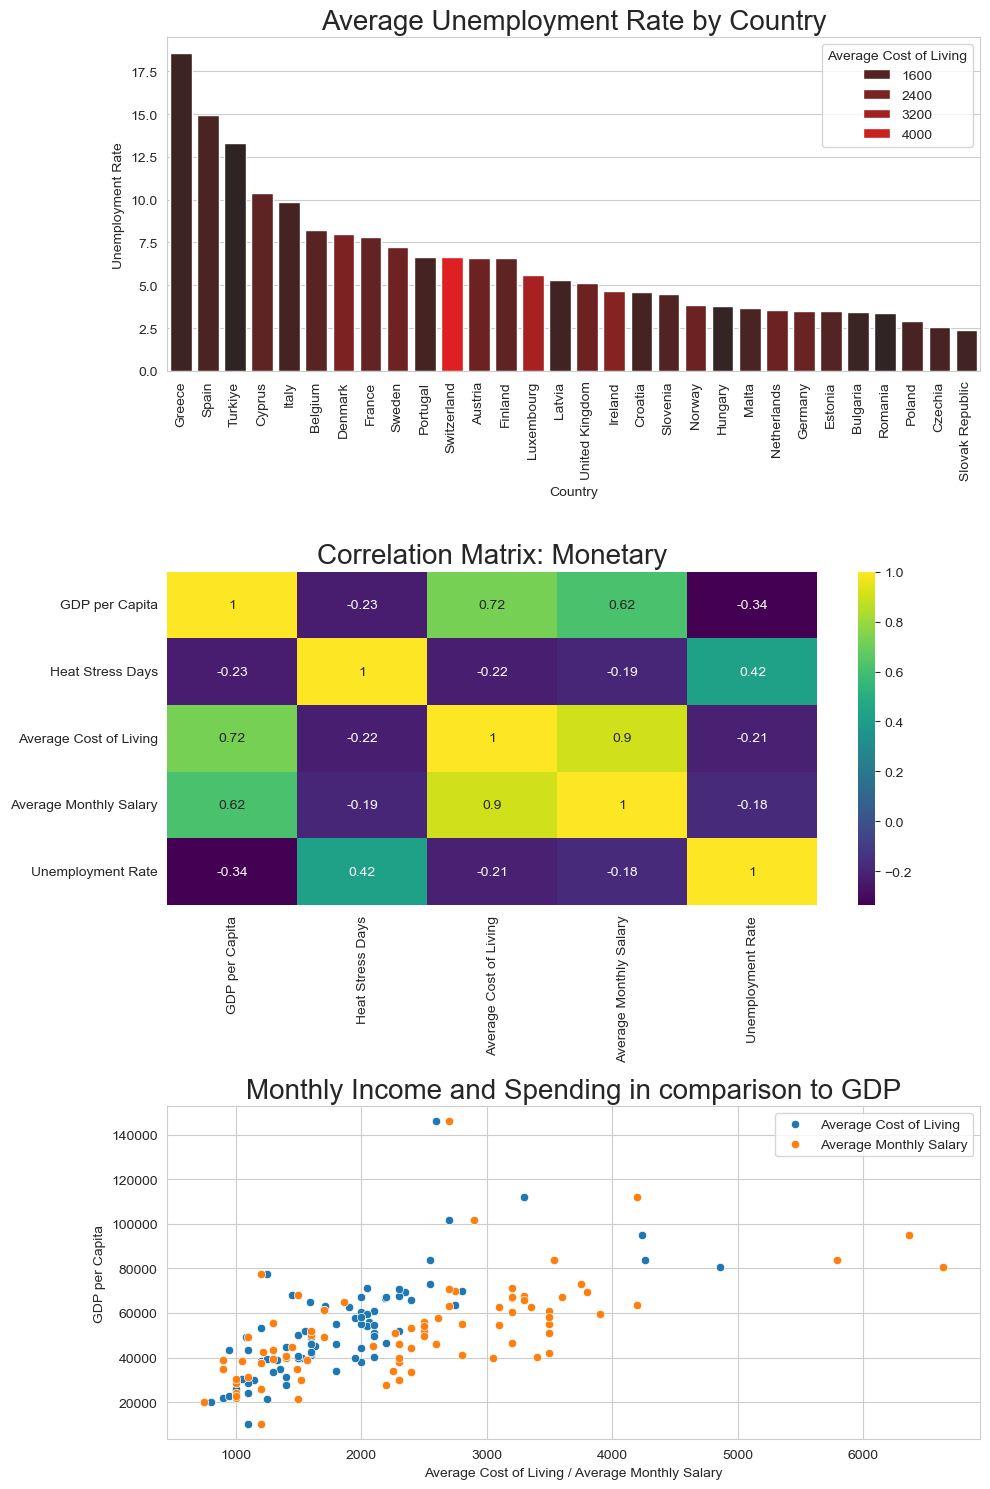

In [28]:
broke = cities.sort_values('Unemployment Rate', ascending=False)
avg_broke = broke.reset_index().groupby('Country')[['Unemployment Rate','Average Cost of Living']].mean().sort_values(by='Unemployment Rate',ascending=False)
sns.set_style('whitegrid')
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10, 15))
sns.barplot(x=avg_broke.index,
            y=avg_broke['Unemployment Rate'],
            hue=avg_broke['Average Cost of Living'],
            palette='dark:red',
            ax=ax1)

sns.heatmap(cities[['GDP per Capita', 'Heat Stress Days', 'Average Cost of Living','Average Monthly Salary', 'Unemployment Rate']].corr(),
            annot=True,
            cmap='viridis',
            ax=ax2)

sns.scatterplot(x=cities['Average Cost of Living'],
                y=cities['GDP per Capita'],
                label='Average Cost of Living',
                ax=ax3)
sns.scatterplot(x=cities['Average Monthly Salary'],
                y=cities['GDP per Capita'],
                label='Average Monthly Salary',
                ax=ax3)

ax1.set_xticks(range(len(avg_broke)))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='center')
ax1.set_title('Average Unemployment Rate by Country', fontsize=20)
ax2.set_title('Correlation Matrix: Monetary', fontsize=20)
ax3.set_xlabel('Average Cost of Living / Average Monthly Salary')
ax3.set_title('Monthly Income and Spending in comparison to GDP', fontsize=20)

plt.tight_layout()
plt.savefig(r'C:\Users\Lucas\Documents\NOVA IMS\PDS\Project\three_insights.png')
plt.show()